# Analisando as notas em geral

In [2]:
# importando:
import pandas as pd

#criando o df:
notas = pd.read_csv('ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
# mostrando o tamanho do df:
notas.shape

(100836, 4)

In [4]:
# renomeando as colunas:
notas.columns = ['usuario_id', 'filme_id', 'nota', 'momento']
notas.head()

,usuario_id,filme_id,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# mostrando os valores unicos de uma coluna
notas.nota.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [6]:
# mostrando os valores unicos de uma coluna com suas quantidades
notas.nota.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [7]:
# mostrando a média da coluna
notas.nota.mean()

3.501556983616962

In [8]:
# mostrando a mediana da coluna
notas.nota.median()

3.5

<AxesSubplot:ylabel='Frequency'>

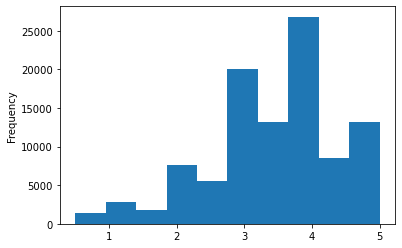

In [9]:
# plotando histograma:
notas.nota.plot(kind='hist')

In [10]:
# método describe:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<AxesSubplot:xlabel='nota'>

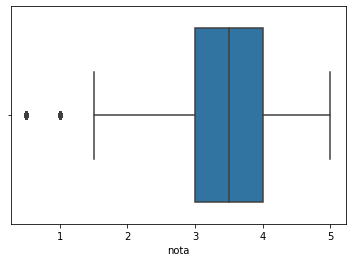

In [11]:
import seaborn as sns

sns.boxplot(x=notas.nota)

# Olhando os filmes

In [12]:
# importando um segundo arquivo csv
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filme_id', 'titulo', 'generos']  # renomeando (tradução)
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando notas de um filme específico

In [13]:
notas.head(2)

,usuario_id,filme_id,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [14]:
# buscando a média das notas do filme de filme-id == 1 (toy story)
notas.query('filme_id == 1').nota.mean()

3.9209302325581397

In [15]:
# agrupando e obtendo a média de cada filme
medias_por_filme = notas.groupby('filme_id').mean().nota
medias_por_filme.head()

filme_id
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

### Plotando as médias:

<AxesSubplot:ylabel='Frequency'>

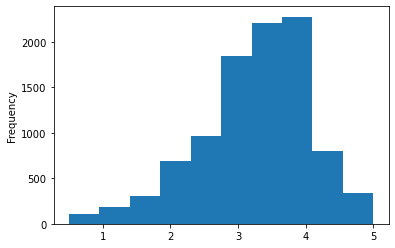

In [16]:
# histograma com o pandas (pyplot):
medias_por_filme.plot(kind='hist')

<AxesSubplot:xlabel='nota'>

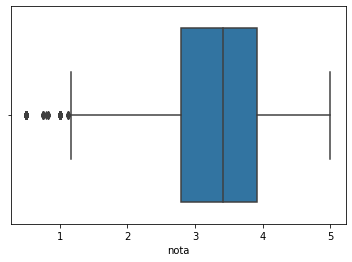

In [17]:
# boxplot com o seaborn:
sns.boxplot(x=medias_por_filme)

<AxesSubplot:ylabel='nota'>

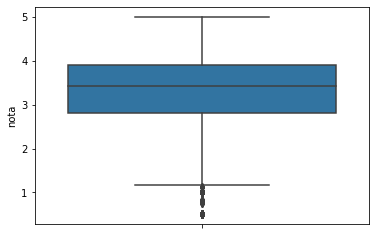

In [18]:
# boxplot na vertical com o seaborn:
sns.boxplot(y=medias_por_filme)

<AxesSubplot:ylabel='nota'>

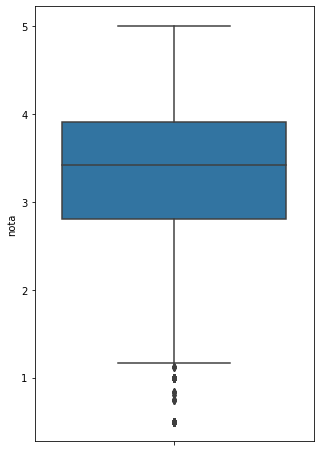

In [19]:
# boxplot na vertical com configuração do tamanho da figura:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 8))
sns.boxplot(y=medias_por_filme)

In [20]:
# describe:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<AxesSubplot:xlabel='nota', ylabel='Count'>

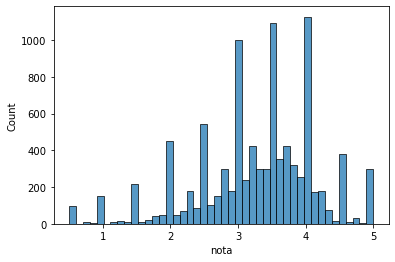

In [21]:
# histograma com o seaborn:
sns.histplot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

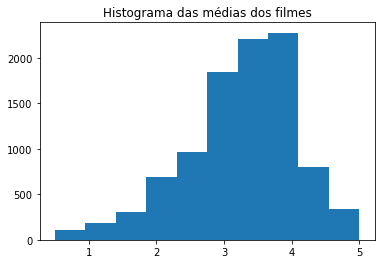

In [22]:
# histograma com o matplotlib.pyplot:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title('Histograma das médias dos filmes')

# Base de dados TMDB

In [23]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head() 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [24]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

# Visualizando

In [25]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<AxesSubplot:xlabel='original_language', ylabel='total'>

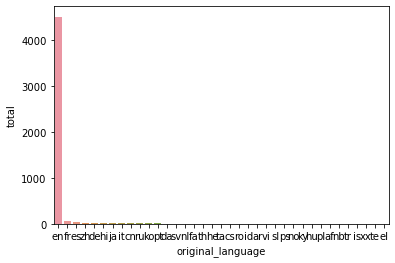

In [26]:
sns.barplot(x='original_language', y='total', data=contagem_de_lingua)

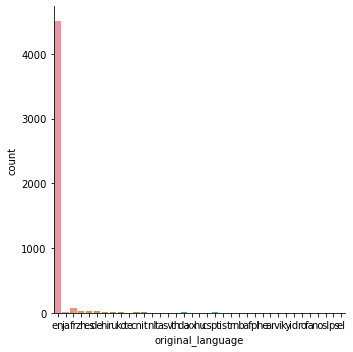

In [27]:
sns.catplot(x='original_language', kind='count', data=tmdb)

([<matplotlib.patches.Wedge at 0x19b7ce32f10>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

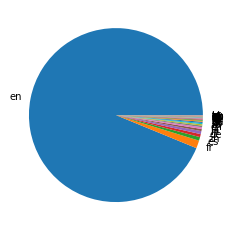

In [28]:
# gráfico torta feio
plt.pie(contagem_de_lingua['total'], labels=contagem_de_lingua['original_language'])

In [29]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [30]:
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_do_resto]}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [31]:
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<AxesSubplot:xlabel='lingua', ylabel='total'>

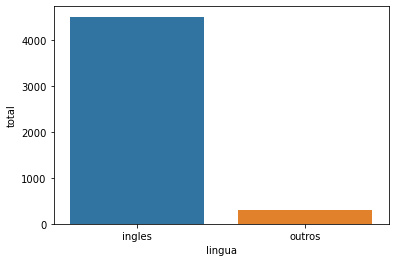

In [32]:
sns.barplot(data=dados, x='lingua', y='total')

([<matplotlib.patches.Wedge at 0x19b7d00da60>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

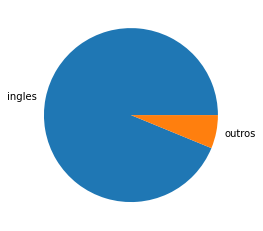

In [33]:
plt.pie(dados['total'], labels=dados['lingua'])

In [34]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

In [35]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

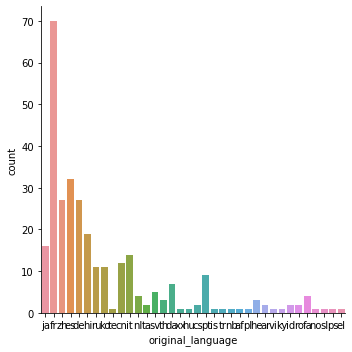

In [36]:
sns.catplot(data=filmes_sem_lingua_original_em_ingles, kind='count', x='original_language')

## Customizando o gráfico acima

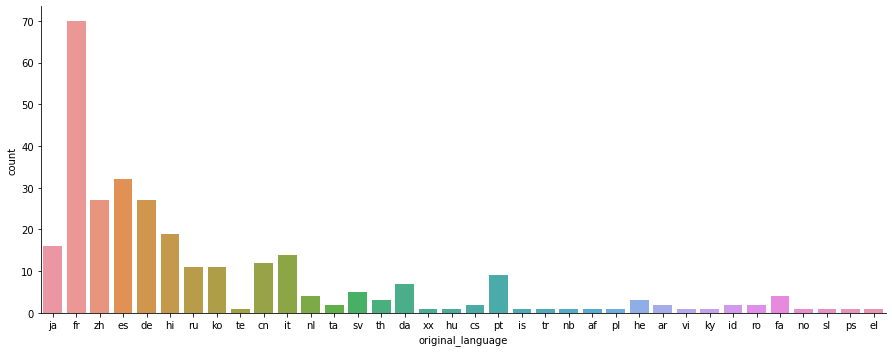

In [37]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

sns.catplot(data=filmes_sem_lingua_original_em_ingles, 
            kind='count', x='original_language',
            aspect=2.5)

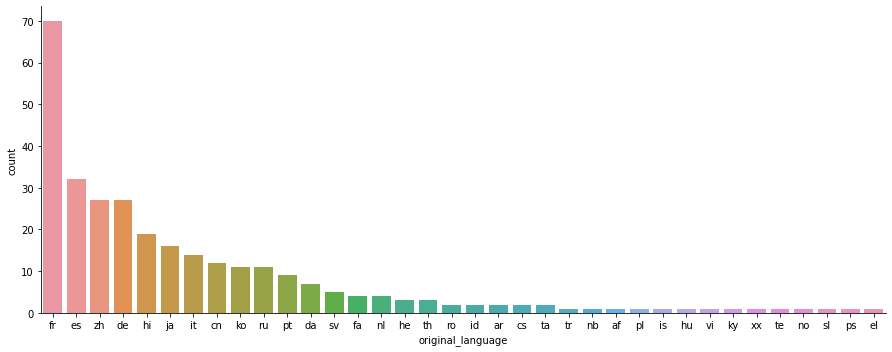

In [38]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

sns.catplot(data=filmes_sem_lingua_original_em_ingles, 
            kind='count', x='original_language',
            aspect=2.5,
            order = total_por_lingua_de_outros_filmes.index)

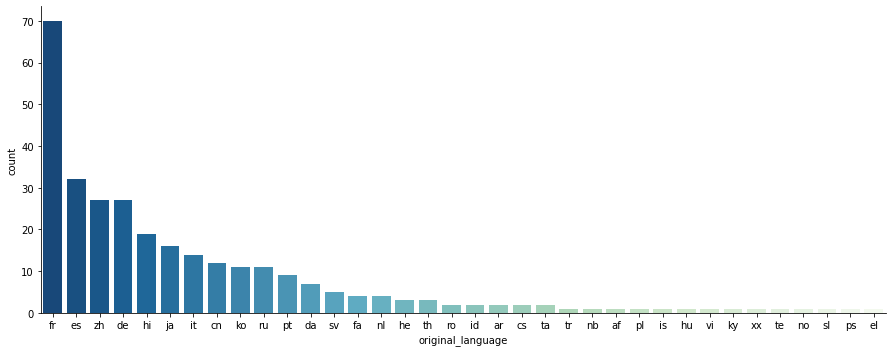

In [39]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

sns.catplot(data=filmes_sem_lingua_original_em_ingles, 
            kind='count', x='original_language',
            aspect=2.5,
            palette='GnBu_r',
            order = total_por_lingua_de_outros_filmes.index)

## Exemplo: lmplot()

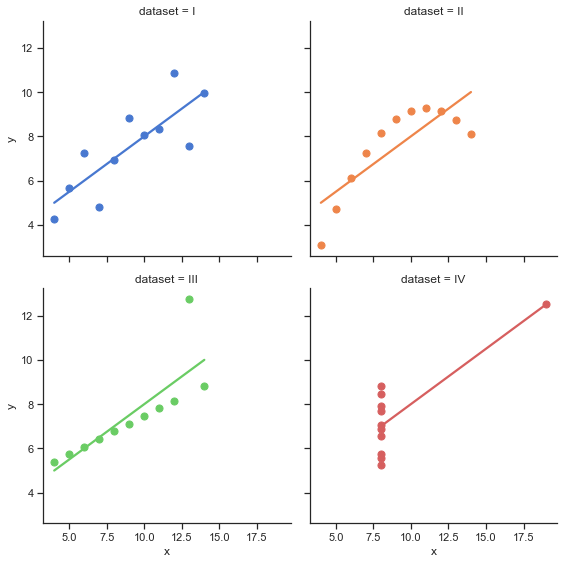

In [40]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# Média, mediana, desvio padrão, boxplot, histograma, tendência central e dispersão, etc

## Média

In [41]:
filmes.head(2)

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [42]:
notas.head(2)

,usuario_id,filme_id,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [43]:
notas.query('filme_id == 1')

,usuario_id,filme_id,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [44]:
notas_toy_story = notas.query('filme_id == 1')
notas_jumanji = notas.query('filme_id == 2')
print(len(notas_toy_story), len(notas_jumanji))

215 110


In [45]:
print(f'Nota média do Toy Story: {notas_toy_story.nota.mean():.2f}')
print(f'Nota média do Jumanji: {notas_jumanji.nota.mean():.2f}')

Nota média do Toy Story: 3.92
Nota média do Jumanji: 3.43


## Mediana

In [61]:
print(f'Nota mediana do Toy Story: {notas_toy_story.nota.median():.2f}')
print(f'Nota mediana do Jumanji: {notas_jumanji.nota.median():.2f}')

Nota mediana do Toy Story: 4.00
Nota mediana do Jumanji: 3.50


## Boxplot

<AxesSubplot:xlabel='nota'>

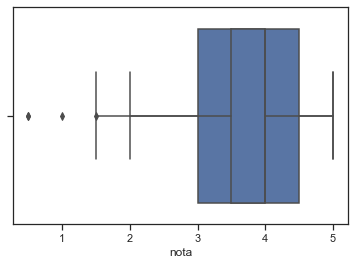

In [47]:
# boxplot com seaborn:
sns.boxplot(x=notas_toy_story.nota)
sns.boxplot(x=notas_jumanji.nota)

{'whiskers': [<matplotlib.lines.Line2D at 0x19b7dee8580>,
 'caps': [<matplotlib.lines.Line2D at 0x19b7dee8c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b7dee81f0>,
 'medians': [<matplotlib.lines.Line2D at 0x19b7def23a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x19b7def2730>,
 'means': []}

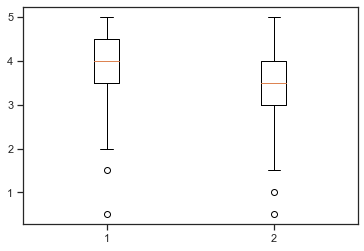

In [48]:
# boxplot com matplotlib:
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota])

<AxesSubplot:xlabel='filme_id', ylabel='nota'>

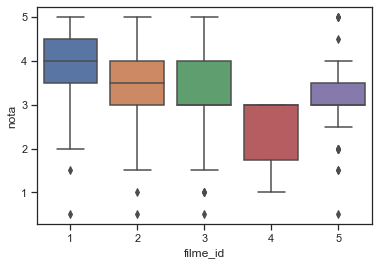

In [51]:
sns.boxplot(x='filme_id', y='nota', data=notas.query('filme_id in [1, 2, 3, 4, 5]'))

## 

## Desvio padrão

In [60]:
print(notas_jumanji.nota.std(), '   ', notas_toy_story.nota.std())

0.8817134921476455     0.8348591407114045


## Exemplo: Numpy

Brincando com arrays

In [65]:
np.array([2.5] * 10)

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5])

In [67]:
import numpy as np
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [71]:
print('Média: ', filme1.mean(), filme2.mean())
print('Mediana: ', np.median(filme1), np.median(filme2))
print('Desvio padrão: ', filme1.std(), filme2.std())

Média:  3.0 3.0
Mediana:  3.0 3.0
Desvio padrão:  0.5 2.0
